In [582]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import csv
import json

In [583]:
#Paths
INPUT_PATH = '../data/input/raw/'
OUTPUT_PATH = '../data/output/preprocessing/'


# Load the dataset
dataset = pd.read_csv(INPUT_PATH + '240624_validation_data.csv')

# Select the date for which you want to extract the data
selected_date = '2023-04-01'

# Number of scenarios to generate
num_scenarios = 50


In [584]:
# Extract the time, forecasted demand and actual demand
time = dataset['time']
time = pd.to_datetime(time, utc=True)
forecast_demand = dataset['predicted heat']
actual_demand = dataset['delivered heat']

# Create a dataframe with the necessary columns
df_data = pd.DataFrame({'time' : time, 'actual_demand': actual_demand, 'forecast_demand': forecast_demand})
df_data['hour']=time.dt.hour

# Calculate the error and absolute error
df_data['error']= df_data['actual_demand'] - df_data['forecast_demand']

# Calculate the mean of the error for whole dataset
mu_all = df_data['error'].mean()
sigma_all = df_data['error'].std()
print('Mean of of the error of each hour:', mu_all)
print('Standard deviation of the mean of the error of each hour:', sigma_all)

df_data

Mean of of the error of each hour: -8.39020298257356
Standard deviation of the mean of the error of each hour: 31.42172005784749


,time,actual_demand,forecast_demand,hour,error
0,2023-03-02 16:00:00+00:00,254.990005,255.590651,16,-0.600646
1,2023-03-02 17:00:00+00:00,187.787503,237.501176,17,-49.713673
2,2023-03-02 18:00:00+00:00,230.629171,264.220971,18,-33.591800
3,2023-03-02 19:00:00+00:00,233.329169,236.491860,19,-3.162691
4,2023-03-02 20:00:00+00:00,222.775003,216.179837,20,6.595167
...,...,...,...,...,...
2996,2023-07-12 19:00:00+00:00,55.804167,51.912949,19,3.891219
2997,2023-07-12 20:00:00+00:00,14.191667,37.334409,20,-23.142742
2998,2023-07-12 21:00:00+00:00,22.533334,37.278034,21,-14.744700
2999,2023-07-12 22:00:00+00:00,15.287500,37.703201,22,-22.415700


In [585]:
# Calculate the mean and standard deviation of the error of each hour of a day. 
error = df_data.groupby('hour')['error'].agg(['mean', 'std']).reset_index()
error  = error.rename(columns={'mean': 'mu', 'std': 'sigma'})

# Save the error data to a dictionary
error_dict = error.set_index('hour').to_dict(orient='index')

# Print the error dictionary
error_dict


{0: {'mu': -12.731658021190215, 'sigma': 25.018753157221795},
 1: {'mu': -8.717701939869812, 'sigma': 25.787822594592562},
 2: {'mu': 38.62809145641247, 'sigma': 40.06221098717317},
 3: {'mu': -11.219355528775246, 'sigma': 35.89610812413864},
 4: {'mu': 4.6619634940865975, 'sigma': 29.89150310430875},
 5: {'mu': -3.1503448513536596, 'sigma': 30.62503489088334},
 6: {'mu': -11.665524616604312, 'sigma': 28.687483429676817},
 7: {'mu': -8.965185204385374, 'sigma': 30.89163216771525},
 8: {'mu': -4.254730131452734, 'sigma': 29.0944311173442},
 9: {'mu': -9.849400683302798, 'sigma': 33.982800569041345},
 10: {'mu': -16.93716965553407, 'sigma': 31.972997351520558},
 11: {'mu': -11.808679656691835, 'sigma': 27.301664271959485},
 12: {'mu': -14.417149987864374, 'sigma': 29.132160670687032},
 13: {'mu': -11.036739802937781, 'sigma': 27.055038468354763},
 14: {'mu': -14.235238982654698, 'sigma': 29.627671262886945},
 15: {'mu': -12.303575238253774, 'sigma': 33.18363957415679},
 16: {'mu': -7.271

In [586]:
# Extract the data for the selected date
daily_date = df_data[df_data['time'].dt.date == pd.to_datetime(selected_date).date()].reset_index(drop=True)
daily_date = daily_date[['time', 'hour', 'actual_demand', 'forecast_demand', 'error']]
if(len(daily_date)==24):
    print('The selected date has 24 hours')
else:
    print('The selected date does not have 24 hours')
daily_date

The selected date has 24 hours


,time,hour,actual_demand,forecast_demand,error
0,2023-04-01 00:00:00+00:00,0,45.141668,79.256436,-34.114768
1,2023-04-01 01:00:00+00:00,1,71.408335,88.850384,-17.442050
2,2023-04-01 02:00:00+00:00,2,234.970838,166.624694,68.346144
3,2023-04-01 03:00:00+00:00,3,146.212502,113.137177,33.075326
4,2023-04-01 04:00:00+00:00,4,131.770836,118.939521,12.831315
5,2023-04-01 05:00:00+00:00,5,129.470836,124.614834,4.856001
6,2023-04-01 06:00:00+00:00,6,160.633337,125.941581,34.691755
7,2023-04-01 07:00:00+00:00,7,168.050002,118.988194,49.061808
8,2023-04-01 08:00:00+00:00,8,162.475003,113.102637,49.372366
9,2023-04-01 09:00:00+00:00,9,96.350001,103.574392,-7.224391


---

## First Methode

In [587]:
# Generate scenarios for the selected date
forecast_demand = daily_date['forecast_demand']

scenarios = np.zeros((num_scenarios, 24))


for i in range(len(daily_date)):
    mu = error_dict[i]['mu']
    sigma = error_dict[i]['sigma']
    print('Hour:', i, 'Mean:', mu, 'Standard deviation:', sigma)

    # Generate hourly scenarios using normal distribution
    hourly_scenarios = np.random.normal(mu, sigma, num_scenarios)
    print('Hourly scenarios:', hourly_scenarios)
    scenarios[:, i] = forecast_demand[i] + hourly_scenarios
    
scenarios_df = pd.DataFrame(scenarios)




Hour: 0 Mean: -12.731658021190215 Standard deviation: 25.018753157221795
Hourly scenarios: [ -9.3042071   61.75274363 -25.98876319  12.41571316   0.36762725
   2.8524934  -22.66446727 -46.21109428   8.93426622 -39.481097
  21.20523585 -24.81643923  -7.80822209 -17.67450703 -23.77315333
 -15.42891958 -67.946489    -2.42937485 -22.63864823 -49.95471572
 -34.85371621 -25.73616215  17.81625095  23.68129137 -27.89811881
  18.68720708   1.80354048 -35.45275392  -0.96897612   0.52042259
 -21.32971713   3.68406611 -22.64846336 -37.94013518   4.63568078
  10.09994629  59.49555611 -11.79734342  24.16360609  -2.6694607
 -24.78557035  24.41605565   7.48185548 -17.96200582 -45.07430295
 -34.63770015  -0.629453     2.31689219  -7.32034873  16.40962205]
Hour: 1 Mean: -8.717701939869812 Standard deviation: 25.787822594592562
Hourly scenarios: [-21.75441088  11.03519963  42.58829424 -43.98038802  11.89306732
  -1.60700502 -25.17722251  21.04453699 -23.42084178  14.895079
 -20.74537075  -8.9673323  -53.

In [588]:
# Calculte the probability of each scenario
probabilities = np.ones(num_scenarios)

for i in range(len(daily_date)):
    mu = error_dict[i]['mu']
    sigma = error_dict[i]['sigma']

    # Calculate the probability for each scenario
    hourly_errors = scenarios[:, i] - forecast_demand[i]
    hourly_probabilities = stats.norm(mu, sigma).pdf(hourly_errors)

    probabilities = probabilities * hourly_probabilities

scenarios_df['probability'] = probabilities

scenarios_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,probability
0,69.952229,67.095973,292.728123,100.344238,164.605001,114.308653,92.666830,114.531673,86.694791,61.983155,...,118.213438,103.684992,123.278892,77.940832,94.908567,70.385987,50.820535,39.615379,49.832590,9.462872e-49
1,141.009180,99.885584,173.532299,93.328358,148.659819,96.737627,104.372389,126.680786,117.072209,71.275734,...,54.283708,100.105011,118.122403,115.133135,101.326230,42.183632,33.507234,44.433253,74.616998,2.418662e-49
2,53.267673,131.438679,159.211108,85.150651,95.050175,128.078179,117.307718,130.521443,137.452502,79.443591,...,87.046856,101.892110,104.667815,163.555725,40.806118,46.977403,64.561140,74.406975,83.963109,1.767875e-51
3,91.672149,44.869996,220.260324,84.657415,68.745473,140.025951,104.604021,97.286219,100.559074,58.740465,...,91.305524,53.755529,141.812895,95.130932,119.730213,35.935485,15.457598,30.891204,92.213019,8.027404e-51
4,79.624063,100.743452,225.912740,132.520368,101.590068,144.202340,105.935276,129.475124,78.623316,125.993043,...,154.821244,90.548718,77.560248,76.943034,110.923572,61.461714,77.133301,18.851385,58.984667,4.820461e-49
5,82.108929,87.243379,347.229323,163.185964,150.403858,62.903368,166.671241,147.369619,98.205366,182.787068,...,116.180325,95.197669,130.854011,94.352841,62.862921,48.807288,78.846927,36.599849,53.235742,1.388720e-54
6,56.591969,63.673162,215.756495,84.501652,145.301034,153.231919,129.692510,115.215878,140.895114,94.386381,...,50.932546,102.512001,112.044458,82.409012,104.397226,69.134712,10.444423,65.383458,47.680902,2.285530e-48
7,33.045342,109.894921,203.794757,59.988014,117.121022,144.224578,109.024269,137.489522,144.958550,158.084611,...,76.672497,150.596303,145.517805,76.581545,86.808003,41.283606,72.200551,83.575806,50.690104,4.995751e-51
8,88.190702,65.429543,214.515742,82.351179,131.298102,194.844249,129.970307,112.381008,104.882715,73.761470,...,126.127539,105.069708,152.071694,120.902892,116.920138,20.276086,63.645222,74.531702,63.017616,8.643766e-51
9,39.775339,103.745463,267.974237,65.518839,162.057031,119.867063,120.257385,108.972193,86.667892,136.732179,...,120.191966,75.147560,137.708551,99.767228,67.121903,129.251633,69.219060,86.665158,52.082989,3.759685e-52


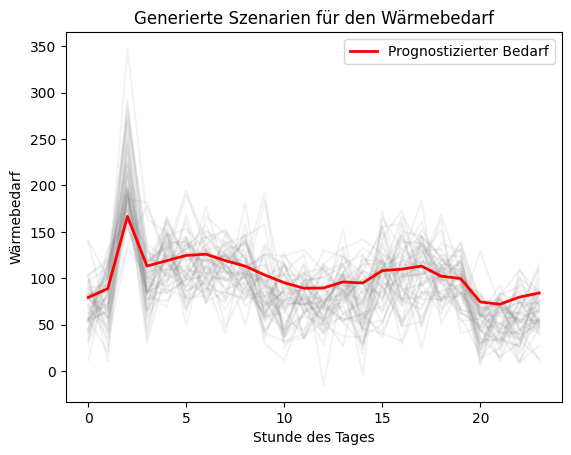

In [589]:
plt.plot(scenarios.T, color='grey', alpha=0.1)  # alle Szenarien plotten
plt.plot(daily_date['forecast_demand'], color='red', linewidth=2, label='Prognostizierter Bedarf')
plt.xlabel('Stunde des Tages')
plt.ylabel('Wärmebedarf')
plt.title('Generierte Szenarien für den Wärmebedarf')
plt.legend()
plt.show()

---

## Second Methode: Monte Carlo Sampling and Roulette Wheel Mechanism


In [590]:
# number of intervals
num_intervals = 7  
intervals = np.linspace(mu_all - 3*sigma_all, mu_all + 3*sigma_all, 8)
interval_centers = (intervals[:-1] + intervals[1:]) / 2  
print('Intervals:',intervals)
print('Interval Centers:',interval_centers)

# calculate the probabilities
probabilities = [stats.norm.cdf(intervals[i+1], mu_all, sigma_all) - stats.norm.cdf(intervals[i], mu_all, sigma_all) for i in range(len(intervals)-1)]
cum_probabilities = np.cumsum(probabilities)

# print the probabilities
print('Probabilities:',probabilities)
print('Edge on Scale 0.XX-0.99X Probabilities:',cum_probabilities)

# Function to randomly select an interval based on the CDF

def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1


# Generate scenarios
T = 24  # Number of time steps
scenarios = []
heat_demand_data = {} # Dictionary to store the heat demand data
for _ in range(num_scenarios):
    scenario = []
    for t in range(T):
        interval_index = select_interval(cum_probabilities)
        scenario.append(interval_centers[interval_index])
    scenarios.append(scenario)

    
# Calculate normed probability for each scenario
scenario_probabilities = np.prod([[probabilities[select_interval(cum_probabilities)] for _ in range(T)] for _ in range(num_scenarios)], axis=1)
normalized_probabilities = scenario_probabilities / scenario_probabilities.sum()

# Convert scenarios to DataFrame for better visualization
scenarios_mu_df = pd.DataFrame(scenarios, columns=[f'Time_{t}' for t in range(T)])
probabilities_df = pd.DataFrame(normalized_probabilities, columns=['Probability'])

for i in range(num_scenarios):
    scenario_name = f'Scenario_{i+1}'
    heat_demand_data[scenario_name] = {
        'Probability': normalized_probabilities[i],
        'Heat Demand': scenarios[i]
    }


Intervals: [-102.65536316  -75.72246025  -48.78955734  -21.85665444    5.07624847
   32.00915138   58.94205428   85.87495719]
Interval Centers: [-89.1889117  -62.2560088  -35.32310589  -8.39020298  18.54269992
  45.47560283  72.40850574]
Probabilities: [0.014712387572198223, 0.08320911123950271, 0.2348461740542938, 0.33176485820475055, 0.23484617405429364, 0.0832091112395027, 0.014712387572198171]
Edge on Scale 0.XX-0.99X Probabilities: [0.01471239 0.0979215  0.33276767 0.66453253 0.89937871 0.98258782
 0.9973002 ]


In [591]:
# Number of intervals
num_intervals = 7

# Store the data
scenarios_df = []
heat_demand_data = {}

# Generate scenarios
scenarios=[]
scenario_probabilities = []
actual_demand = []



# Function to randomly select an interval based on the CDF
def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1


# Generate intervals

for _ in range(num_scenarios):
    scenario_name = f"Scenario {i+1}"
    scenario = []
    scenario_probability = 1
    for t in range(len(daily_date)):

        mu = error_dict[t]['mu']
        sigma = error_dict[t]['sigma']
        #print(f'Mean:{t} {mu} Standard Deviation:{t} {sigma}')

        # Define the intervals
        intervals = np.linspace(mu - 3*sigma, mu + 3*sigma, num_intervals + 1)
        #print(f'Interval:{t} {intervals}')
        interval_centers  = (intervals[:-1] + intervals[1:]) / 2
        #print(f'Interval Centers:{t} {interval_centers}')

        probabilities = [
                stats.norm.cdf(intervals[i + 1], mu, sigma) - stats.norm.cdf(intervals[i], mu, sigma) 
                for i in range(len(intervals) - 1)
            ]
        #print(f'Probabilities:{t} {probabilities}')
        cum_probabilities = np.cumsum(probabilities)
        #print(f'Cumulative Probabilities:{t} {cum_probabilities}')

        # Select interval index based on cumulative probabilities
        interval_index = select_interval(cum_probabilities)
        #print(probabilities[interval_index])
        #print(interval_index)   

        # Append selected center to the scenario
        #print(interval_centers[interval_index])
        forecast_error = interval_centers[interval_index]
        actual_demand = daily_date['forecast_demand'][t] + forecast_error
        scenario.append(actual_demand)
        scenario_probability *= probabilities[interval_index]
        #print(f'Scenrio Probability: {scenario_probability}')
        
    # Store the scenario
    heat_demand_data[scenario_name] = {
        "Probability": scenario_probability,
        **{t: value for t, value in enumerate(scenario)}
    }

print(heat_demand_data)

scenario_probabilities  

# Normalizing the scenario probabilities
total_probability = sum(scenario_probabilities) 
normalized_scenario_probabilities = [p / total_probability for p in scenario_probabilities]

# Output scenarios and their normalized probabilities
for i, (scenario, prob) in enumerate(zip(scenarios, normalized_scenario_probabilities)):
    print(f"Scenario {i+1}: {scenario}")
    print(f"Normalized Probability: {prob:.4f}")
# Calculate the Probability of each scenario
#print('Scenarios:',scenarios)
#print('Scenario Probabilities:',scenario_probabilities)

#scenario_probabilities



{'Scenario 50': {'Probability': 3.952048329253441e-16, 0: 45.08013230561872, 1: 102.2365303301181, 2: 205.25278568015838, 3: 132.68591397124777, 4: 123.60148456232284, 5: 68.9644296631048, 6: 138.86532829694522, 7: 110.02300859269768, 8: 83.90982319848445, 9: 35.46876156787769, 10: 78.26453304637994, 11: 100.83001338512702, 12: 75.02184677728769, 13: 38.65420888017846, 14: 105.98647790886393, 15: 95.95006267421034, 16: 74.4760551180779, 17: 108.77300716275587, 18: 105.3897610197237, 19: 114.37469308275939, 20: 72.62203762986137, 21: 18.560395127447777, 22: 58.60329614894012, 23: 65.42417526203123}}


In [592]:
import numpy as np
import random
from scipy import stats

# Number of intervals
num_intervals = 7

# Store the data
scenarios = []
scenario_probabilities = []
heat_demand_data = {}


# Function to randomly select an interval based on the CDF
def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1

# Generate scenarios
for scenario_index in range(num_scenarios):
    scenario_name = f"Scenario{scenario_index + 1}"
    scenario = []
    scenario_probability = 1
    
    for t in range(len(daily_date)):
        mu = error_dict[t]['mu']
        sigma = error_dict[t]['sigma']
        
        # Define the intervals
        intervals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, num_intervals + 1)
        interval_centers = (intervals[:-1] + intervals[1:]) / 2
        
        # Calculate probabilities for each interval
        probabilities = [
            stats.norm.cdf(intervals[i + 1], mu, sigma) - stats.norm.cdf(intervals[i], mu, sigma)
            for i in range(len(intervals) - 1)
        ]
        cum_probabilities = np.cumsum(probabilities)
        
        # Select interval index based on cumulative probabilities
        interval_index = select_interval(cum_probabilities)
        
        # Calculate forecast error and add to forecast demand
        forecast_error = interval_centers[interval_index]
        actual_demand = forecast_demand[t] + forecast_error
        scenario.append(actual_demand)
        
        # Multiply the probability of this interval to the scenario probability
        scenario_probability *= probabilities[interval_index]
    
    # Store the scenario and its probability in the dictionary
    heat_demand_data[scenario_name] = {
        "Probability": scenario_probability,
        **{t: value for t, value in enumerate(scenario)}
    }
    # Collect scenario probabilities for normalization
    scenario_probabilities.append(scenario_probability)

# Normalizing the scenario probabilities
total_probability = sum(scenario_probabilities)
for scenario_name in heat_demand_data:
    heat_demand_data[scenario_name]["Probability"] /= total_probability

#heat_demand_data

#Output the scenarios and their normalized probabilities
for scenario_name, data in heat_demand_data.items():
    print(f"{scenario_name}:")
    print(f"  Normalized Probability: {data['Probability']:.4f}")
    print(f"  Values: {[data[t] for t in range(len(daily_date))]}")


Scenario1:
  Normalized Probability: 0.0166
  Values: [45.08013230561872, 58.0288344536737, 170.91374769115282, 101.91782129341466, 149.22277293744463, 68.9644296631048, 138.86532829694522, 110.02300859269768, 83.90982319848445, 93.72499111480572, 50.859106745076616, 77.42858686630458, 124.96269364132262, 38.65420888017846, 105.98647790886393, 124.39318230920189, 74.4760551180779, 136.60318822001253, 105.3897610197237, 73.41781478518759, 54.32091626987172, 35.60999678203349, 38.432899173316926, 45.21040051314371]
Scenario2:
  Normalized Probability: 0.0030
  Values: [45.08013230561872, 102.2365303301181, 170.91374769115282, 40.38163593774841, 123.60148456232284, 173.96454928899053, 138.86532829694522, 57.06592487661439, 133.78599082821736, 64.59687634134171, 105.66995934768329, 54.02716034748218, 25.080999913252782, 61.84424185305396, 105.98647790886393, 95.95006267421034, 102.56346993215129, 108.77300716275587, 81.86713330208153, 93.8962539339735, 54.32091626987172, 86.7588017457906, 

In [593]:
# Speichern des Dictionaries in einer JSON-Datei

filename = 'heat_demand_scenarios.json'
file = f'{OUTPUT_PATH}{filename}'

with open(file, 'w') as json_file:
    json.dump(heat_demand_data, json_file, indent=4)

# Laden des Dictionaries aus der JSON-Datei
with open(file, 'r') as json_file:
    loaded_data = json.load(json_file)

print(loaded_data)

{'Scenario1': {'Probability': 0.016643735752490004, '0': 45.08013230561872, '1': 58.0288344536737, '2': 170.91374769115282, '3': 101.91782129341466, '4': 149.22277293744463, '5': 68.9644296631048, '6': 138.86532829694522, '7': 110.02300859269768, '8': 83.90982319848445, '9': 93.72499111480572, '10': 50.859106745076616, '11': 77.42858686630458, '12': 124.96269364132262, '13': 38.65420888017846, '14': 105.98647790886393, '15': 124.39318230920189, '16': 74.4760551180779, '17': 136.60318822001253, '18': 105.3897610197237, '19': 73.41781478518759, '20': 54.32091626987172, '21': 35.60999678203349, '22': 38.432899173316926, '23': 45.21040051314371}, 'Scenario2': {'Probability': 0.0029517018844716046, '0': 45.08013230561872, '1': 102.2365303301181, '2': 170.91374769115282, '3': 40.38163593774841, '4': 123.60148456232284, '5': 173.96454928899053, '6': 138.86532829694522, '7': 57.06592487661439, '8': 133.78599082821736, '9': 64.59687634134171, '10': 105.66995934768329, '11': 54.02716034748218, '

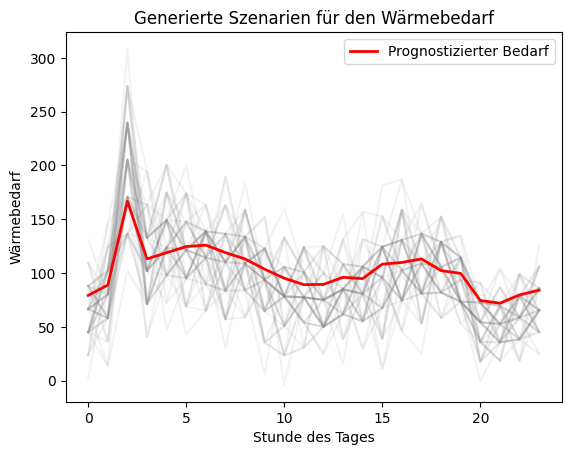

In [594]:
# Convert scenarios to DataFrame for plotting
scenarios_df = pd.DataFrame({name: data for name, data in heat_demand_data.items()}).drop('Probability').T

# Plot all scenarios and forecast demand
plt.plot(scenarios_df.T, color='grey', alpha=0.1)  # alle Szenarien plotten
plt.plot(daily_date['forecast_demand'], color='red', linewidth=2, label='Prognostizierter Bedarf')
plt.xlabel('Stunde des Tages')
plt.ylabel('Wärmebedarf')
plt.title('Generierte Szenarien für den Wärmebedarf')
plt.legend()
plt.show()

## Szenarien Reduktion

In [595]:
# Importing the libraries

from sklearn.cluster import KMeans
from scipy.stats import entropy

### Backward Scenario Reduction Methode
Ergänzen.

### Improved k-means Clustering

Ergänzen.